# 분류

## 분류(Classification)의 개요

- 지도학습의 대표적인 유형

### 분류는 다양한 머신러닝 알고리즘으로 구현 가능

- 베이즈(Bayes)통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)<br><br>

- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)<br><br>

- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)<br><br>

- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)<br><br>

- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor)알고리즘<br><br>

- 심층 연결 기반의 신경망(Neural Network)<br><br>

- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

## 결정트리

- if/else기반 스무고개 게임 형태<br><br>

- 새로운 규칙 조건마다 규칙 노드 기반의 서브 트리 생성<br><br>

- But! 많은 규칙이 있다는 것은 즉, 분류를 결정하는 방식이 더욱 복잡해진다는 의미이고, 이는 과적합으로 이어지기 쉽다. 즉 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

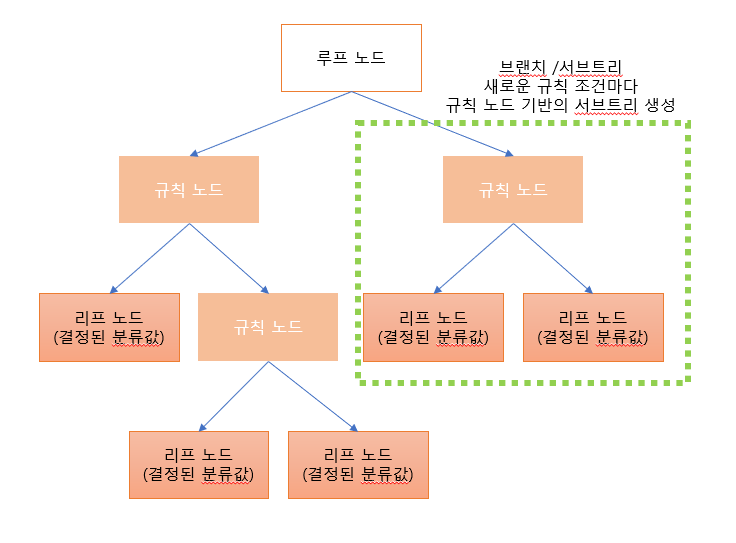

- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다.<br><br>

- 이를 위해서 어떻게 트리를 분할(split)할 것인가가 중요한데, 최대한 균일한 데이터 세트를 구성할 수 있도록 분할 하는 것이 필요하다.

### 균일한 데이터

- 균일한 데이터란 데이터 세트가 A,B,C가 각각 30개의 공을 가지고 있다.<br><br> 

- 그중 A세트는 흰색 15개 검은색 15개, B세트는 흰색 5개 검은색 25개, C세트는 검은색 30개라 가정한다<br><br>

- 이러면 C 세트는 모두 검은공이라 균일도가 가장높고, 그다음 일부 흰색공이 있는 B세트, 마지막으로 A세트 순일거다.<br><br>

- 즉 C세트는 데이터에 대한 별다른 정보없이 검은공이라 예측 가능하고, A세트는 상대적으로 혼잡도높고, 균일도 낮기 때문에 같은 조건에서 데이터를 판단하는 데 더 많은 정보 필요하다.

- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.<br><br>

- 위의 B세트의 경우 if 색깔 == '검은색'이 가장 먼저 만들어지는 규칙일 것이다. (검은색이 가장많고 모양이 똑같기 때문)<br><br>

- 이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보이득(Information Gain)지수와 지니 계수가 있다.

#### 정보이득(Information Gain)

- 정보이득은 엔트로피 개념을 기반으로 한다. 여기서 엔트로피란? 주어진 데이터 집합의 혼잡도를 의미한다.<br><br>

- 서로 다른값이 섞여 있으면 엔트로피(혼잡도)가 높고, 같은 값이 섞여 있으면 엔트로피(혼잡도)가 낮다.<br><br>

- 정보이득은 1 - 엔트로피 지수.<br><br>

- 결정트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성 기준으로 분할.

#### 지니계수

- 지니계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수.<br><br>

- 0이 가장 평등하고, 1로 갈수록 불평등 하다.<br><br>

- 머신러닝 적용시 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

- 여기서 sklearn DecisionTreeClassifier는 기본적으로 지니계수 이용해 데이터 세트 분할!

### 결정트리 모델의 특징<br><br>
결정트리 장점
- 쉽다. 직관적이다.<br><br>
- 피쳐의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다.<br><br>

결정트리 단점
- 과적합으로 알고리즘 성능이 떨어짐.<br><br>
- 이를 극복하기 위해선 트리의 크기를 사전에 제한하는 튜닝 필요.

### 결정트리 모델 시각화 API(Graphviz다운 필수)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

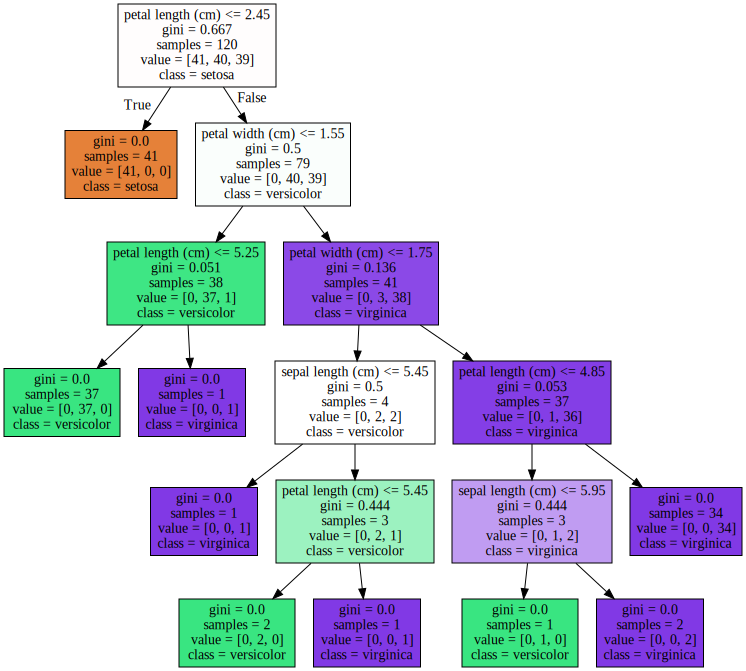

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 위의 트리구성(일부분)

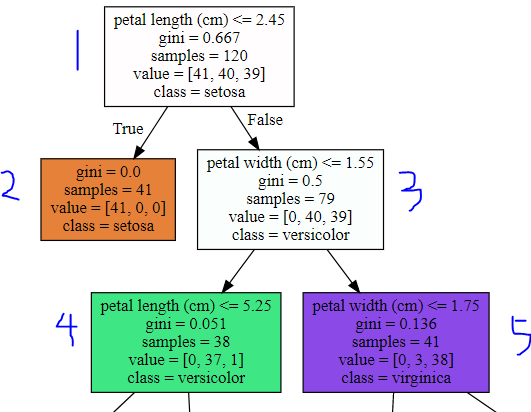

- 1번노드는 전테데이터 120개<br><br>

- value는 구성 Setosa 41개, Versicolor 40개, Virginica 39개<br><br>

- petal length <= 2.45 규칙으로 자식노드 생성

- 자식노드인 2번노드는 petal length <= 2.45 가 True인 규칙으로 setosa에 해당하는 값밖에 없다.

- 자식노드인 3번노드는 petal length <= 2.45가 False인 규칙이며 지니계수는 0.5로 높다.<br><br>

- petal length <= 1.55로 자식노드 생성

- 주황색은 setosa, 초록색은 versicolor, 보라색은 virginica로 각 노드 색깔은 레이블 값을 의미하고, 색깔이 짙어 질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

#### 트리 깊이 조절하지 않을시 생기는 문제점

- 위의 결과처럼 이미 4번 노드에서 샘플데이터가 versicolor 37개, virginica 1개로 균일도가 높지만 max_depth 제한없이 결정트리를 만들어, 분류가 불필요하고 매우 복잡한 규칙트리가 만들어져서 모델이 쉽게 과적합 되는 문제점을 가지게 된다.

### 깊이 3인 결정트리 만들기

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree_3.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

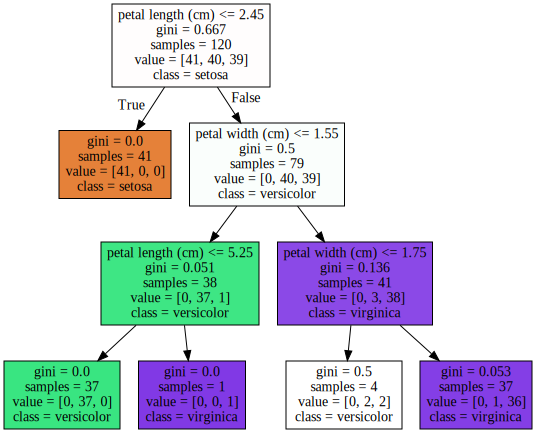

In [6]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree_3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 아까보다는 훨씬 잘나누어 진거 같다.

### min_samples_split, min_samples_leaf 차이 알아보기

#### min_samples_split = 4

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [8]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree_min_samples_split_4.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

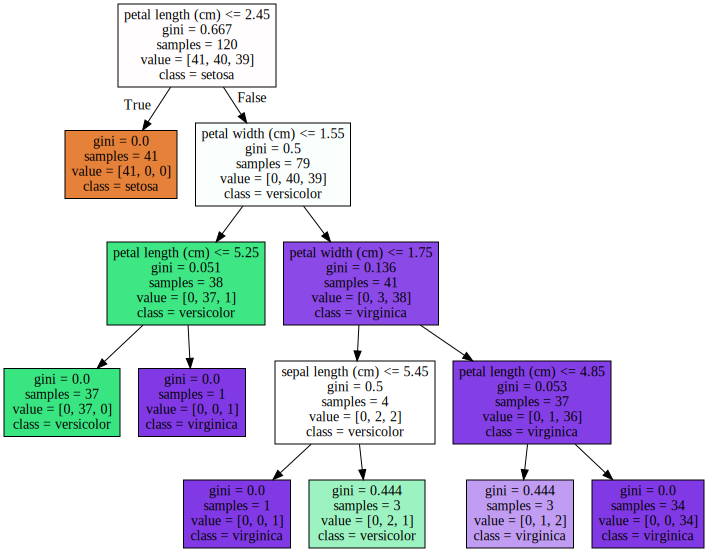

In [9]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree_min_samples_split_4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 위에선 자식노드로 분할시 샘플의 최소개수가 4이상인 것 까지만 자식노드가 생기게 된다.

#### min_samples_leaf = 4

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf = 4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

In [11]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree_min_samples_leaf_4.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

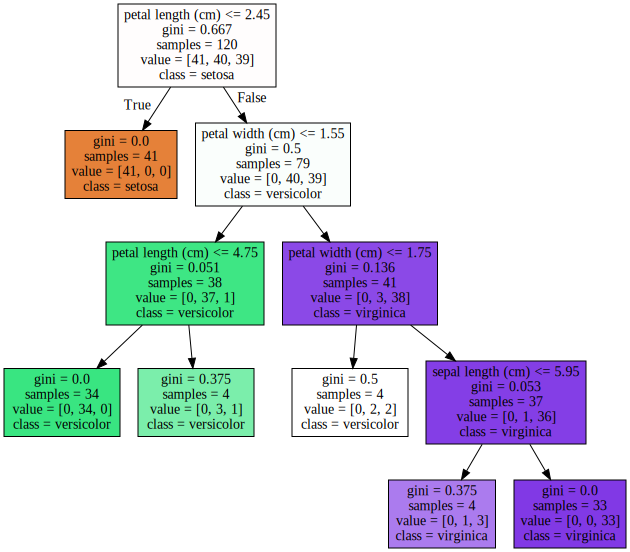

In [12]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree_min_samples_leaf_4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 위에선 샘플이 4가 되는 순간 리프노드가 되어 결정트리가 좀더 간결하게 표현이 된 것처럼 보인다.

- 이처럼 결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 중요한 몇개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있다.

### 피쳐별 중요도 시각화 하기 (feature_importances_)

Feature importances : 
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.0
petal length (cm) : 0.546
petal width (cm) : 0.448


<AxesSubplot:>

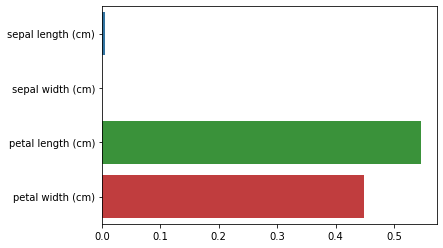

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f"Feature importances : \n{np.round(dt_clf.feature_importances_, 3)}")

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f"{name} : {np.round(value, 3)}")

# feature importance를 column별로 시각화
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

- petal length가 가장 피처 중요도가 높은 것을 알수 있다.

### 결정 트리 과적합(Overfitting)

In [33]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

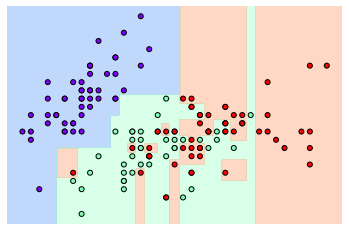

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target

X = iris_df.values[:,:2] # 독립변수를 전부 그래프로 나타내려면 우선 차원을 증가시켜야하는데 일단 변수 2개만 이용해 2차원 그래프로 시각화 시켜보았다.
y = iris_df.values[:,4:]

# 특정한 트리 생성 제약 없는 결정 트리의 학습
dt_clf = DecisionTreeClassifier().fit(X, y)
visualize_boundary(dt_clf, X, y)

- 결정 기준 경계가 많아 한눈에 봐도 이상치가 많이 있어보임

#### min_samples_leaf 로 시각화

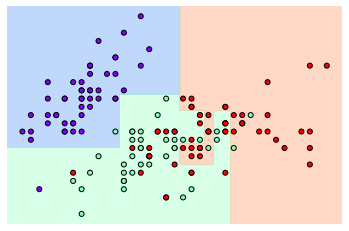

In [44]:
# 특정한 트리 생성 제약 없는 결정 트리의 학습
dt_clf = DecisionTreeClassifier(min_samples_leaf = 4).fit(X, y)
visualize_boundary(dt_clf, X, y)

- 그래도 어느정도 잘 분류된 것 처럼 보인다.

### 결정 트리 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                              header = None, names = ['column_index', 'column_name'])

# 피쳐명 index를 제거하고, 피쳐명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print("전체 피쳐명에서 10개만 추출 : ",feature_name[:10])

전체 피쳐명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축 값으로 돼 있음을 유추할 수 있다.

In [4]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 위에서 42개의 피쳐명이 중복되어 있는것 확인가능<br><br>

- 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성<br><br>

- 중복된 feature 삭제해줌

In [5]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

#### human_activity 파일 여는 전용 함수 샐성

In [6]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    # sep = '\s+' 스페이스 한칸이상으로 분류
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [7]:
print("## 학습 피쳐 데이터셋 info 확인")
print(X_train.info())

## 학습 피쳐 데이터셋 info 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [8]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


##### 레이블값 분포 확인

In [9]:
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도: {:.4f}".format(accuracy))

# DecisionTreeClassifier 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


- 정확도 : 85.48%

#### 교차 검증 5세트로 설정하고 max_depth를 계속 늘이며 예측성능 측정

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


- 깊이 16일시 5개의 폴드 세트의 최고 평균 정확도 결과가 약 85.13%로 도출

#### GridSearchCV 객체 cv_results_속성을 DataFrame으로 설정 ( 하이퍼 파라미터를 순파적으로 입력했을때의 성능수치 가지고 있음 )

In [14]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.937201,0.040358,0.008579,0.001371,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,2.404963,0.043312,0.008971,0.000631,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,2.843093,0.082140,0.009572,0.001627,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,3.175212,0.137442,0.008986,0.001685,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,3.548282,0.269754,0.008583,0.001013,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1


In [15]:
# max_depth값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [16]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


- 깊이가 8일때 정확도가 87.07% 로 가장 높아 보였다. 그 이후 정확도가 감소하는 것 처럼 보인다.

#### max_depth와 min_samples_split같이 변경하며 정확도 성능 튜닝해봄.

In [18]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


#### 위에서 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}로 학습이 완료된 Estimator (best_estimator_로)불러옴

In [19]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


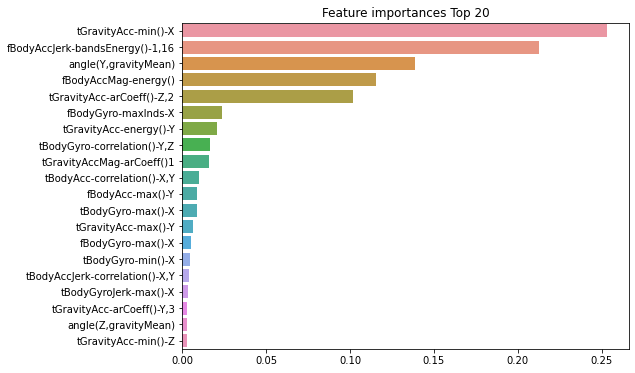

In [21]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()